In [1]:
import matplotlib.pyplot as plt
import ml_collections
import numpy as np
import torch
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from seisLM.data_pipeline.foreshock_aftershock_dataloaders import (
  prepare_foreshock_aftershock_dataloaders,
)
from seisLM.model.task_specific.foreshock_aftershock_models import (
  Wav2vec2ShockClassifierLit,
)
from seisLM.utils.project_path import gitdir

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_args = ml_collections.ConfigDict(
  {
    "amp_norm_axis": -1,
    "amp_norm_type": "std",
    "batch_size": 16,
    "component_order": "ZNE",
    "demean_axis": -1,
    "dimension_order": "NCW",
    "event_split_method": "temporal",
    "num_workers": 8,
    "test_frac": 0.2,
    "train_frac": 0.7,
    "val_frac": 0.1,
  }
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
def get_confusion_matrix(model_relative_path, num_classes):
  loaders = prepare_foreshock_aftershock_dataloaders(
    num_classes=num_classes, **data_args
  )

  model = Wav2vec2ShockClassifierLit.load_from_checkpoint(
    gitdir() + model_relative_path, load_pretrained=False
  )

  model = model.to(device)
  model = model.eval()

  all_gt_class = []
  all_pred_class = []
  all_losses = []

  model = model.to(device)
  model.eval()

  for X, y in loaders["test"]:
    with torch.no_grad():
      logits = model(X.to(device)).cpu()
      pred_class = np.argmax(logits.numpy(), axis=1)
      loss = torch.nn.functional.cross_entropy(logits, y)
      all_losses.append(loss.item())

    all_gt_class.append(y)
    all_pred_class.append(pred_class)

  all_gt_class = np.concatenate(all_gt_class)
  all_pred_class = np.concatenate(all_pred_class)

  cm = confusion_matrix(all_gt_class, all_pred_class)
  cm_percentage = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  return np.rint(cm_percentage)

In [4]:
# model_relative_path = "/results/models/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_1.0_2024-09-10-14h-32m-11s/checkpoints/last.ckpt"
path_dict = {
  2: {
    "SeisLM-base": "/results/models/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_2_frac_1.0_2024-09-25-17h-06m-56s/checkpoints/last.ckpt",
    "SeisLM-large": "/results/models/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_2_frac_1.0_2024-09-25-17h-06m-59s/checkpoints/last.ckpt",
  },
  4: {
    "SeisLM-base": "/results/models/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_4_frac_1.0_2024-09-25-17h-06m-56s/checkpoints/last.ckpt",
    "SeisLM-large": "/results/models/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_4_frac_1.0_2024-09-25-17h-06m-59s/checkpoints/last.ckpt",
  },
  8: {
    "SeisLM-base": "/results/models/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_8_frac_1.0_2024-09-25-17h-06m-57s/checkpoints/last.ckpt",
    "SeisLM-large": "/results/models/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_8_frac_1.0_2024-09-25-17h-07m-00s/checkpoints/last.ckpt",
  },
  9: {
    "SeisLM-base": "/results/models/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_1.0_2024-09-25-17h-06m-57s/checkpoints/last.ckpt",  # "/results/models/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_1.0_2024-09-10-21h-54m-36s/checkpoints/last.ckpt",
    "SeisLM-large": "/results/models/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_1.0_2024-09-25-17h-07m-00s/checkpoints/last.ckpt",  # "/results/models/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_1.0_2024-09-10-14h-34m-33s/checkpoints/last.ckpt",
  },
}


In [5]:
confusion_matrix_dict = {}


for num_classes, model_path_dict in path_dict.items():
  confusion_matrix_dict[num_classes] = {}
  for model_key, model_path in model_path_dict.items():
    cm = get_confusion_matrix(model_path, num_classes=num_classes)
    confusion_matrix_dict[num_classes][model_key] = cm


Seed set to 42
Seed set to 42
/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.4.0, which is newer than your current Lightning version: v2.2.5
Seed set to 42
Seed set to 42
/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.4.0, which is newer than your current Lightning version: v2.2.5
Seed set to 42
Seed set to 42
/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.4.0, which is newer than your current Lightning version: v2.2.5
Seed set to 42
Seed set to 42
/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.

In [6]:
confusion_matrix_dict[2]["ConvNet"] = np.array(
  [
    [98, 2],
    [1, 99],
  ]
).T

confusion_matrix_dict[4]["ConvNet"] = np.array(
  [
    [86, 14, 0, 0],
    [16, 83, 0, 1],
    [1, 1, 26, 71],
    [1, 3, 13, 84],
  ]
).T

confusion_matrix_dict[8]["ConvNet"] = np.array(
  [
    [93, 0, 0, 0, 1, 2, 4, 1],
    [8, 71, 11, 9, 0, 0, 0, 1],
    [4, 28, 16, 49, 0, 0, 1, 3],
    [1, 1, 1, 52, 0, 0, 4, 40],
    [0, 0, 0, 0, 89, 9, 2, 0],
    [0, 0, 0, 0, 61, 32, 7, 0],
    [0, 1, 0, 0, 3, 14, 13, 68],
    [0, 0, 0, 1, 4, 19, 20, 57],
  ]
).T

confusion_matrix_dict[9]["ConvNet"] = np.array(
  [
    [84, 1, 0, 0, 0, 5, 0, 10, 1],
    [7, 68, 20, 3, 0, 0, 0, 0, 1],
    [4, 36, 43, 16, 1, 0, 0, 0, 1],
    [1, 2, 16, 58, 3, 0, 0, 5, 15],
    [0, 0, 0, 0, 99, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 80, 9, 10, 0],
    [0, 0, 0, 0, 0, 43, 1, 56, 0],
    [0, 0, 2, 0, 1, 1, 2, 30, 66],
    [1, 0, 0, 0, 0, 1, 0, 36, 62],
  ]
).T

In [7]:
display_labels_dict = {
  2: ["Foreshock", "Aftershock"],
  4: ["FEQ1", "FEQ2", "AEQ1", "AEQ2"],
  8: ["FEQ1", "FEQ2", "FEQ3", "FEQ4", "AEQ1", "AEQ2", "AEQ3", "AEQ4"],
  9: [
    "FEQ1",
    "FEQ2",
    "FEQ3",
    "FEQ4",
    "Visso",
    "AEQ1",
    "AEQ2",
    "AEQ3",
    "AEQ4",
  ],
}

/tmp/ipykernel_1477083/3302555439.py:72: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use ax.tick_params and colorbar.set_label instead.
  grid.cbar_axes[0].toggle_label(True)  # Show colorbar labels


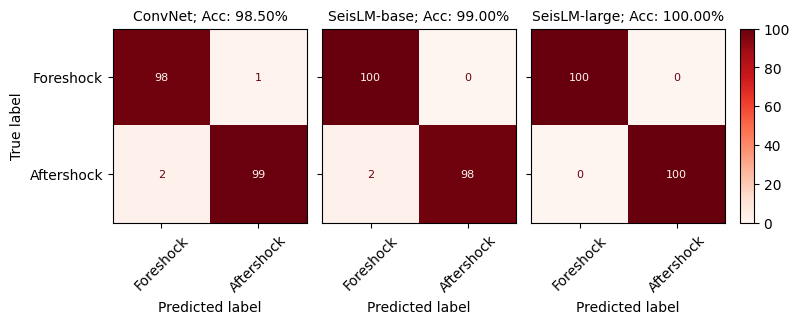

/tmp/ipykernel_1477083/3302555439.py:72: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use ax.tick_params and colorbar.set_label instead.
  grid.cbar_axes[0].toggle_label(True)  # Show colorbar labels


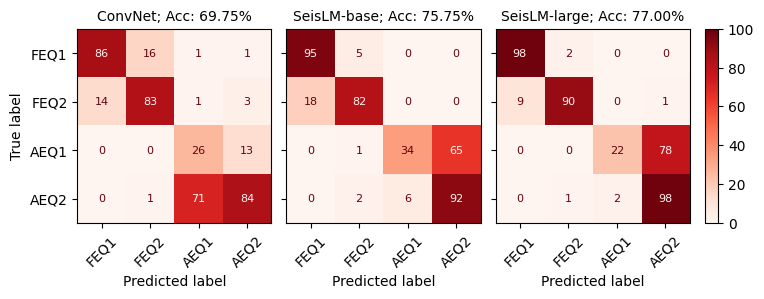

/tmp/ipykernel_1477083/3302555439.py:72: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use ax.tick_params and colorbar.set_label instead.
  grid.cbar_axes[0].toggle_label(True)  # Show colorbar labels


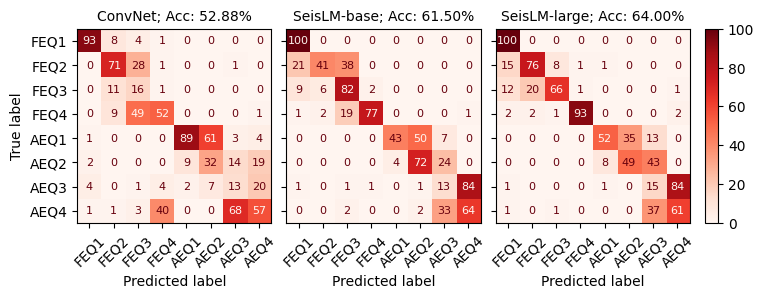

/tmp/ipykernel_1477083/3302555439.py:72: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use ax.tick_params and colorbar.set_label instead.
  grid.cbar_axes[0].toggle_label(True)  # Show colorbar labels


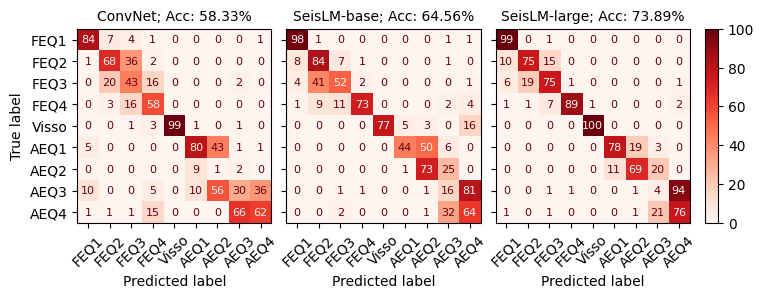

In [8]:
from mpl_toolkits.axes_grid1 import ImageGrid


# Function to format confusion matrix values as integers
def format_confusion_matrix_values(ax):
  # Loop over all text objects in the confusion matrix and format them
  for text in ax.texts:
    val = float(text.get_text())
    text.set_text(f"{int(val)}")  # Display as integer
    text.set_fontsize(8)


# Assuming confusion_matrix_dict is already defined
A4_WIDTH = 8.27
FONT_SIZE = 10

# Create figure

for (
  num_classes,
  single_class_confusion_matrix_dict,
) in confusion_matrix_dict.items():
  fig = plt.figure(figsize=(A4_WIDTH, A4_WIDTH / 3))

  # Set up ImageGrid
  grid = ImageGrid(
    fig,
    111,  # equivalent to plt.subplot(111)
    nrows_ncols=(1, 3),  # 1 row, 3 columns
    axes_pad=0.15,  # Padding between axes
    share_all=True,  # Share axis labels
    cbar_location="right",  # Place the colorbar on the right
    cbar_mode="single",  # Only one colorbar for all plots
    cbar_size="7%",  # Set colorbar size
    cbar_pad=0.15,
  )  # Padding between the colorbar and axes

  # Update font size parameters for the plot
  plt.rcParams.update(
    {
      "font.size": FONT_SIZE,  # General font size
      "axes.titlesize": FONT_SIZE,  # Subplot titles
      "figure.titlesize": FONT_SIZE,  # Suptitle (main title)
      "legend.fontsize": FONT_SIZE,  # Legend font size
      "pdf.fonttype": 42,  # Embed fonts in PDF for better compatibility
    }
  )

  # Plot each confusion matrix in the grid
  for i, model_name in enumerate(["ConvNet", "SeisLM-base", "SeisLM-large"]):
    val = single_class_confusion_matrix_dict[model_name]
    disp = ConfusionMatrixDisplay(
      confusion_matrix=val,
      display_labels=display_labels_dict[num_classes],
    )
    disp.plot(
      ax=grid[i], xticks_rotation=45, colorbar=False, cmap="Reds"
    )  # No individual colorbars
    grid[i].set_title(
      model_name + "; Acc: {:.2f}%".format(val.diagonal().mean())
    )
    format_confusion_matrix_values(grid[i])

  # Set the color range for all confusion matrices
  vmin, vmax = 0, 100
  for ax in grid:
    im = ax.get_images()[0]  # Get the image from the confusion matrix
    im.set_clim(vmin, vmax)  # Set the color limits

  # Add a single colorbar for all plots
  grid.cbar_axes[0].colorbar(im)  # Use the colorbar axis from ImageGrid
  grid.cbar_axes[0].toggle_label(True)  # Show colorbar labels

  # Display the figure
  plt.show()
  # fig.savefig(
  #   project_path.FIGURE_DIR + "/shock_confusion_matrix.pdf", bbox_inches="tight"
  # )